In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic.csv')

In [4]:
data.head()

,id,'pclass','survived','name','sex','age','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'
0,1,1,1,"Allen,Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis,MO"
1,2,1,1,"Allison,Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal,PQ / Chesterville,ON"
2,3,1,0,"Allison,Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal,PQ / Chesterville,ON"
3,4,1,0,"Allison,Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal,PQ / Chesterville,ON"
4,5,1,0,"Allison,Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal,PQ / Chesterville,ON"


In [5]:
data.replace('?', np.nan, inplace= True)
data.columns = [col.strip("'") for col in data.columns]
data = data.astype({"age": np.float64, "fare": np.float64})

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])


ModuleNotFoundError: No module named 'seaborn'

In [13]:
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr(numeric_only=True).abs()


C:\Users\lacatt\AppData\Local\Temp\ipykernel_25472\2278333768.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


,sex,pclass,age,relatives,fare,survived
sex,1.000000,0.144105,0.062236,0.270339,0.187930,0.537719
pclass,0.144105,1.000000,0.411086,0.158869,0.565255,0.319979
age,0.062236,0.411086,1.000000,0.127289,0.178739,0.053958
relatives,0.270339,0.158869,0.127289,1.000000,0.259822,0.206754
fare,0.187930,0.565255,0.178739,0.259822,1.000000,0.249164
survived,0.537719,0.319979,0.053958,0.206754,0.249164,1.000000


In [14]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]


KeyError: 'sibsp'

In [ ]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# first, for all 5 variables, find the scaling factors (mean and variance) then apply transform to standardise them. Could use .fit then .transform as well.
X_train = sc.fit_transform(x_train)
# second, apply the fitted scaling factors to the test data to transform.
X_test = sc.transform(x_test)

In [17]:
# trees, gaussian naive bayes, and logistic regression models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [18]:
models = {
    'GaussianNB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,100))
}
scores_scaled = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predict_test = model.predict(X_test)
    score = {"Model": name, "Scaled data Accurary Score": metrics.accuracy_score(y_test, predict_test)}
    scores_scaled.append(score)

scores_scaled = pd.DataFrame(scores_scaled)

c:\Users\lacatt\OneDrive - SAS\Python_code\Practice\tf_test\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
# without scaling
X_train = x_train
X_test = x_test

scores_unscaled = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predict_test = model.predict(X_test)
    score = {"Model": name, "Unscaled data Accurary Score": metrics.accuracy_score(y_test, predict_test)}
    scores_unscaled.append(score)

scores_unscaled = pd.DataFrame(scores_unscaled)

                 Model  Scaled data Accurary Score  \
0           GaussianNB                    0.746411   
1        Decision Tree                    0.765550   
2        Random Forest                    0.794258   
3    Gradient Boosting                    0.837321   
4  Logistic Regression                    0.803828   
5       Neural Network                    0.813397   

   Unscaled data Accurary Score  
0                      0.746411  
1                      0.765550  
2                      0.799043  
3                      0.837321  
4                      0.803828  
5                      0.779904  


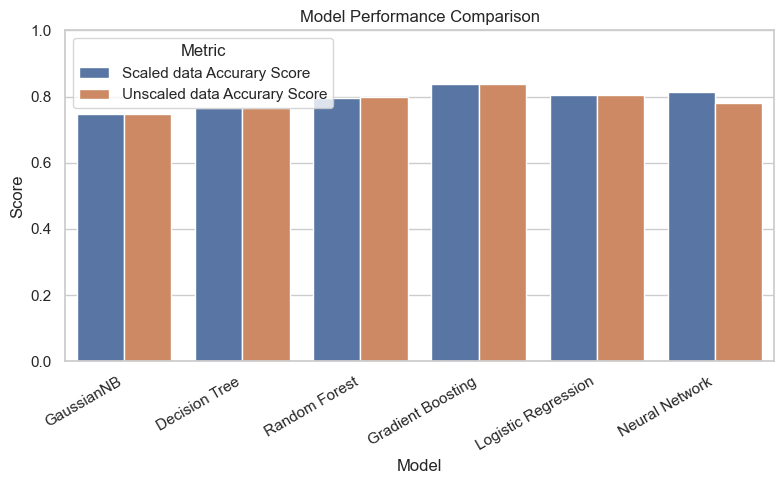

In [23]:
scores = pd.merge(scores_scaled, scores_unscaled, how='left')
print(scores)
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe for seaborn
melted = scores.melt(id_vars="Model", value_vars=["Scaled data Accurary Score", "Unscaled data Accurary Score"],
                       var_name="Metric", value_name="Score")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=melted, x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison")
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [26]:
# neural networks using Keras library with TensorFlow
from keras.models import Sequential
model = Sequential()

In [60]:
from keras.layers import Dense
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
 dense_3 (Dense)             (None, 5)                 10        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
 dense_6 (Dense)             (None, 5)                

In [62]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5861
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 917us/step - loss: 0.6893 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 936us/step - loss: 0.6863 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 984us/step - loss: 0.6808 - accuracy: 0.5861
Epoch 11/50
2

In [63]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 888us/step
0.6124401913875598


In [64]:
# predict specific scenario with model
model.predict(np.array([[0, 0, 60, 0, 50]]))
model.predict(X_test)

7/7 [==============================] - 0s 833us/step


array([[0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.41182438],
       [0.411

In [ ]:
# random test looking at predictions
print(pd.DataFrame({
    'Actual': y_test,
    'Predicted': predict_test
}).head())

      Actual  Predicted
281        1          1
1267       0          1
849        0          0
1066       0          0
109        1          0
